#### Predicting Stock Price Movement with Random Forest
The primary goal is applying the random forest classifer on technical features of stock price and predict whether stock price will close up or down. 

In [5]:
# Import Libraries 
import os 
import sys
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report 
# Let us first try to get stock data by calling yfinance package
# !pip install yfinance

In [15]:
import yfinance as yf 
data = yf.download('AAPL','2017-01-01', '2019-11-01')

[*********************100%***********************]  1 of 1 completed


In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.953873,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.829704,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.393303,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.635139,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.666824,33561900


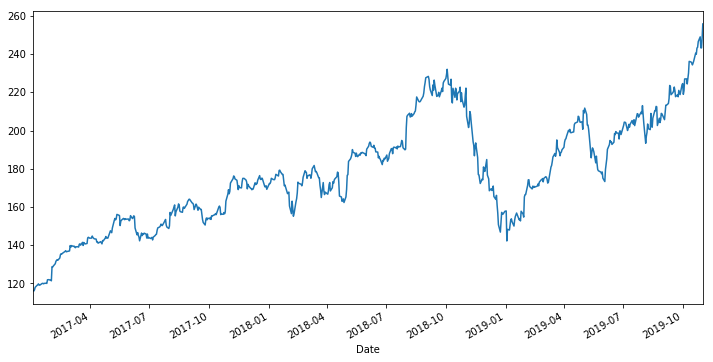

In [18]:
data.Close.plot(figsize=(12,6))
plt.show()

In [57]:
ticker_list = ['JPM','COST','IBM','HD','ARWR']
start = '2018-01-01'
end = '2019-11-30'
raw_data = {}

In [59]:
for ticker in ticker_list:
    raw_data.update({ ticker: yf.download(ticker, start,end)})
#     df = pd.DataFrame(raw_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [70]:
JPM = raw_data['JPM']['Adj Close']
COST = raw_data['COST']['Adj Close']
IBM = raw_data['IBM']['Adj Close']
HD = raw_data['HD']['Adj Close']
ARWR = raw_data['ARWR']['Adj Close']

In [71]:
type(JPM)

pandas.core.series.Series

In [87]:
JPM_df = pd.DataFrame(JPM)
COST_df = pd.DataFrame(COST)
IBM_df = pd.DataFrame(IBM)
HD_df = pd.DataFrame(HD)
ARWR_df = pd.DataFrame(ARWR)

In [96]:
JPM_df.columns =['JPM']
COST_df.columns =['COST']
IBM_df.columns =['IBM']
HD_df.columns =['HD']
ARWR_df.columns =['ARWR']


In [97]:
df = pd.concat([JPM_df, COST_df,IBM_df,HD_df,ARWR_df], axis = 1 , join = 'inner')

In [98]:
df.head()

,JPM,COST,IBM,HD,ARWR
Date,,,,,
2018-01-02,102.337044,184.551941,140.820740,178.999466,3.72
2018-01-03,102.441338,186.766708,144.691605,179.932404,4.64
2018-01-04,103.908867,185.316315,147.622131,181.360367,4.85
2018-01-05,103.241798,183.993347,148.343353,183.254776,4.87
2018-01-08,103.394272,184.708725,149.238037,182.816864,4.55
